In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('amazon_sales_dataset.csv')

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [7]:
print("--- 5---")
print(df.head())

--- 5---
   order_id order_date  product_id product_category   price  discount_percent  \
0         1 2022-04-13        2637            Books  128.75                10   
1         2 2023-03-12        2300          Fashion  302.60                20   
2         3 2022-09-28        3670           Sports  495.80                20   
3         4 2022-04-17        2522            Books  371.95                15   
4         5 2022-03-13        1717           Beauty  201.68                 0   

   quantity_sold customer_region payment_method  rating  review_count  \
0              4   North America            UPI     3.5           443   
1              5            Asia    Credit Card     3.7           475   
2              2          Europe            UPI     4.4           183   
3              4     Middle East            UPI     5.0           212   
4              4     Middle East            UPI     4.6           308   

   discounted_price  total_revenue  
0            115.88         

In [8]:
print("\n--- info---")
print(df.info())


--- info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[ns]
 2   product_id        50000 non-null  int64         
 3   product_category  50000 non-null  object        
 4   price             50000 non-null  float64       
 5   discount_percent  50000 non-null  int64         
 6   quantity_sold     50000 non-null  int64         
 7   customer_region   50000 non-null  object        
 8   payment_method    50000 non-null  object        
 9   rating            50000 non-null  float64       
 10  review_count      50000 non-null  int64         
 11  discounted_price  50000 non-null  float64       
 12  total_revenue     50000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory us

In [9]:
print("\n--- describtion---")
print(df.describe())


--- describtion---
           order_id                     order_date    product_id  \
count  50000.000000                          50000  50000.000000   
mean   25000.500000  2022-12-31 10:47:16.800000256   2986.848740   
min        1.000000            2022-01-01 00:00:00   1000.000000   
25%    12500.750000            2022-07-02 00:00:00   1983.000000   
50%    25000.500000            2023-01-02 00:00:00   2983.000000   
75%    37500.250000            2023-07-02 00:00:00   3989.000000   
max    50000.000000            2023-12-31 00:00:00   4999.000000   
std    14433.901067                            NaN   1156.374535   

              price  discount_percent  quantity_sold        rating  \
count  50000.000000      50000.000000   50000.000000  50000.000000   
mean     252.507260         13.340700       2.999400      2.996316   
min        5.010000          0.000000       1.000000      1.000000   
25%      127.840000          5.000000       2.000000      2.000000   
50%      252.9700

In [10]:
missing_values = df.isnull().sum()
print("\n--missing values---")
print(missing_values)


--missing values---
order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64


In [11]:
df['Month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['total_revenue'].sum()

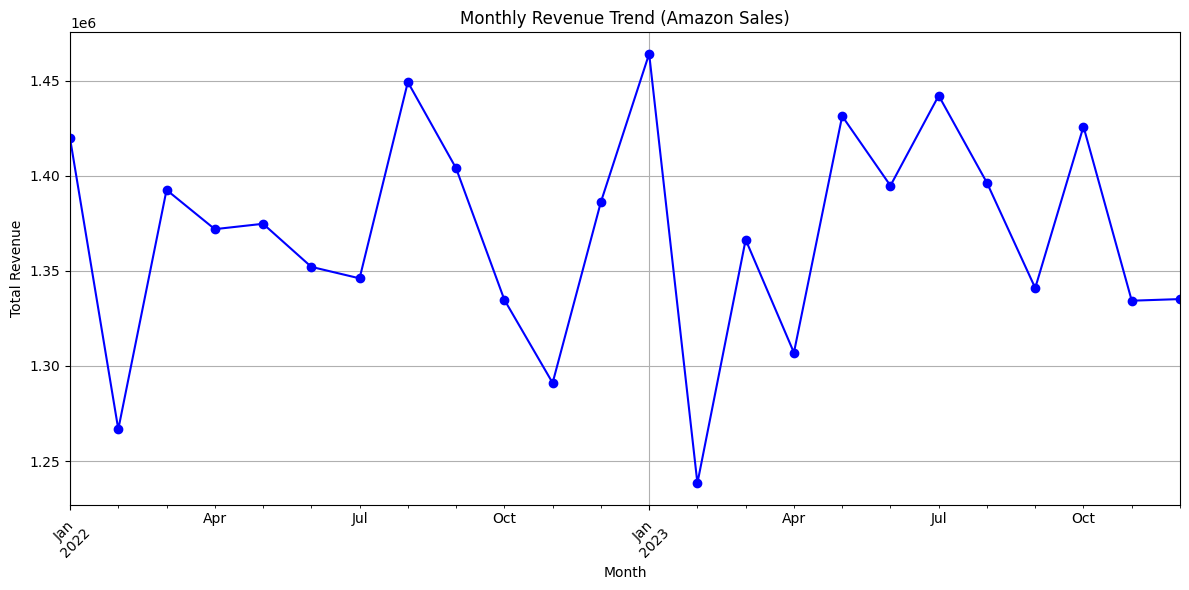

In [12]:
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title("Monthly Revenue Trend (Amazon Sales)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-828520908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_category', y='total_revenue', data=df, estimator=sum, ci=None)


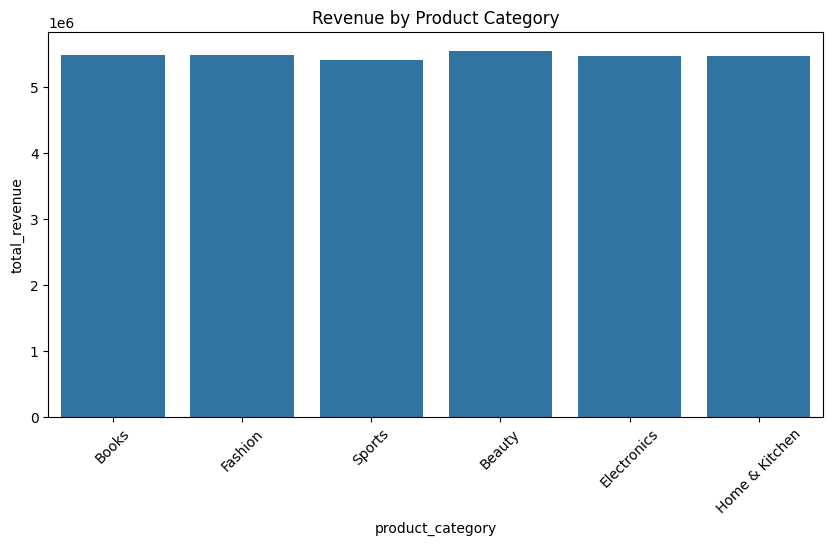

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='product_category', y='total_revenue', data=df, estimator=sum, ci=None)
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()